In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Filter out specific warning
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('social.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [9]:
y_test.shape

(120,)

In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler=StandardScaler()

In [12]:
scaler.fit(df.drop('Purchased', axis=1))

StandardScaler()

In [13]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
scaler.mean_

array([3.76550e+01, 6.97425e+04])

In [18]:
X_train_scaled[1:5]

array([[ 2.13424088,  0.94723686],
       [ 0.03295203,  1.24088543],
       [ 0.22397829,  1.09406114],
       [ 0.41500455, -0.49164111]])

In [19]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
X_train_scaled

,Age,EstimatedSalary
0,-1.113206,-1.607506
1,2.134241,0.947237
2,0.032952,1.240885
3,0.223978,1.094061
4,0.415005,-0.491641
...,...,...
275,0.988083,-1.167033
276,-0.826666,-0.785290
277,-0.158074,-0.521006
278,-1.017692,-0.462276


In [21]:
np.round(X_train.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(X_test.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


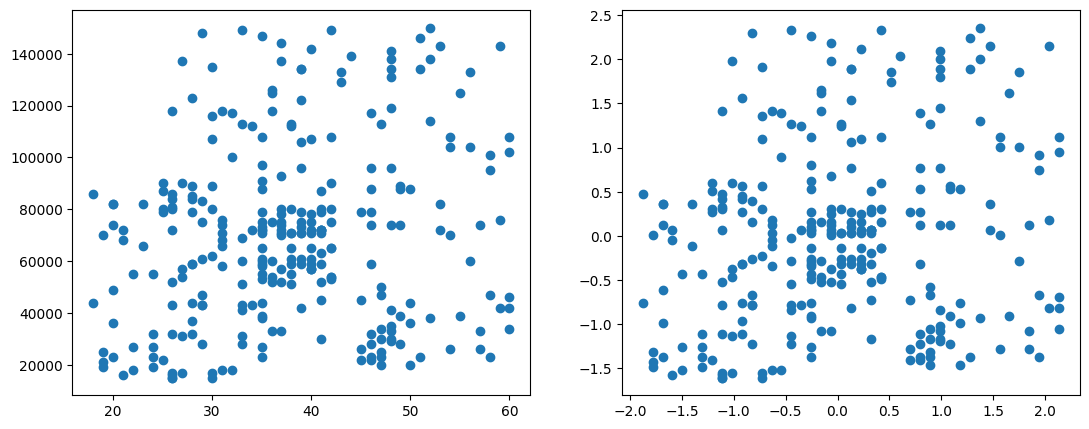

In [23]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(13,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
plt.show()

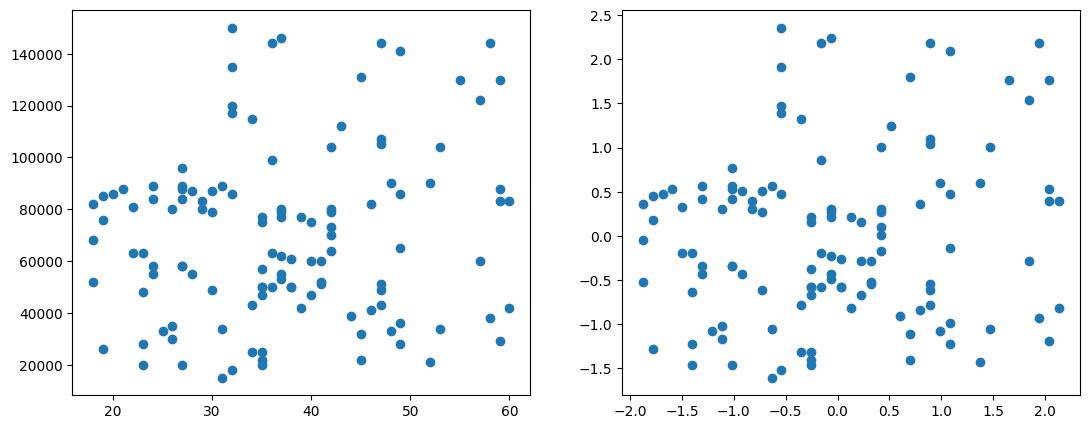

In [24]:
fig, (ax3,ax4)=plt.subplots(ncols=2,figsize=(13,5))
ax3.scatter(X_test['Age'],X_test['EstimatedSalary'])
ax4.scatter(X_test_scaled['Age'],X_test_scaled['EstimatedSalary'])
plt.show()

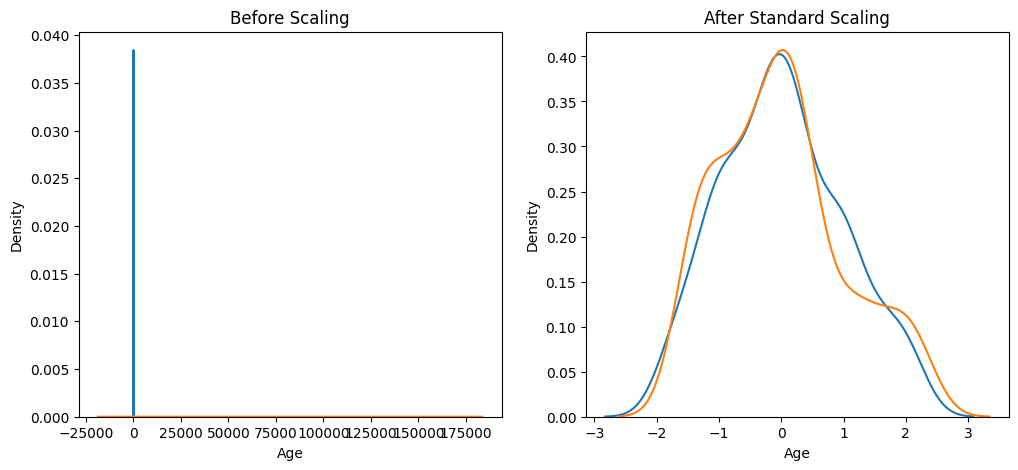

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace inf values with NaN in X_train_scaled
X_train_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot KDE before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# Plot KDE after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show();


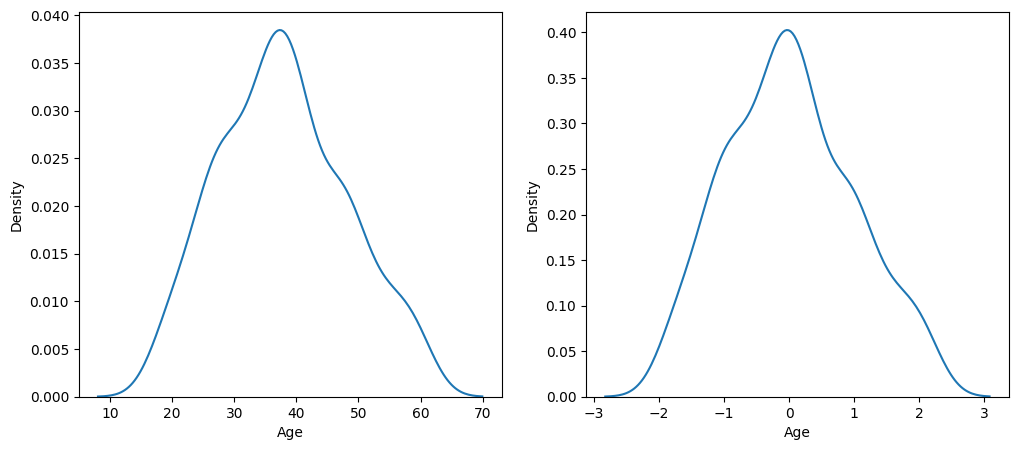

In [26]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1=sns.kdeplot(X_train['Age'],ax=ax1)
ax2=sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

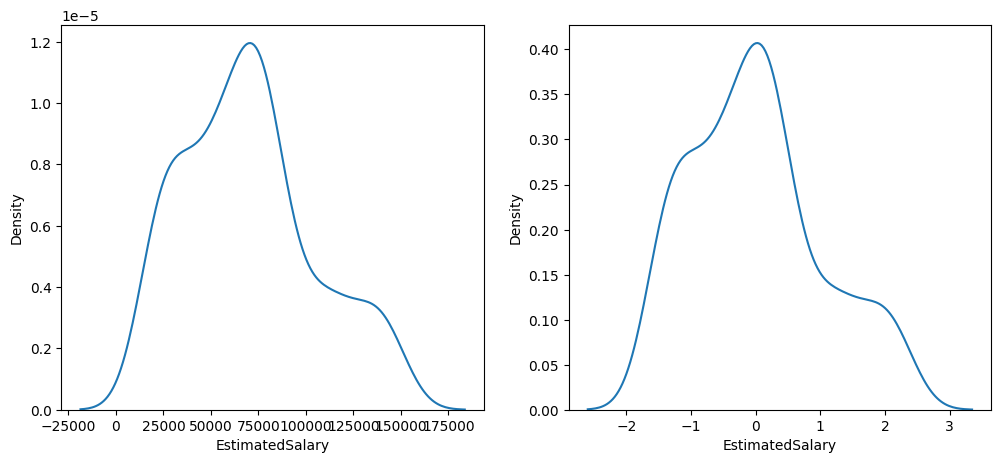

In [27]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1=sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2=sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
l=LogisticRegression()
m=LogisticRegression()

In [30]:
l.fit(X_train,y_train)
m.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
y_pred = l.predict(X_test)
y_pred_scaled = m.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_scaled))

0.875
0.8666666666666667


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)
DecisionTreeClassifier()
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [35]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [36]:
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


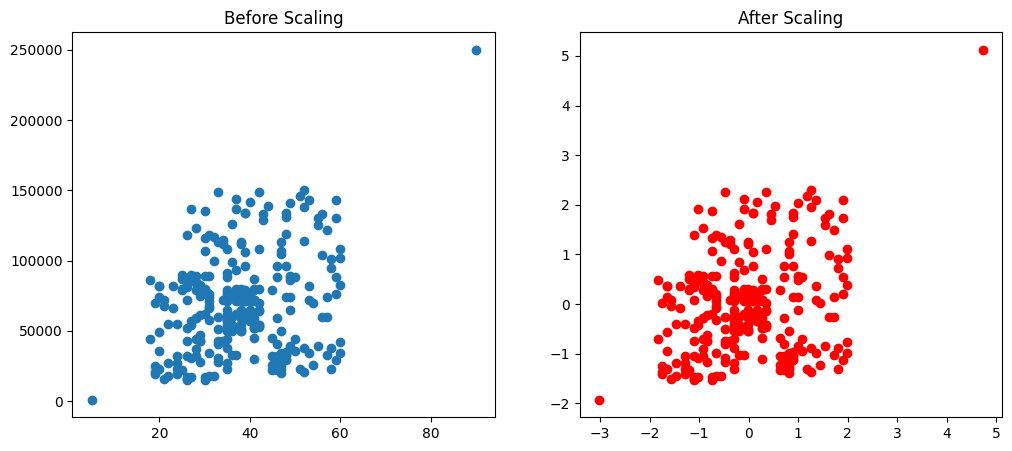

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape
((282, 2), (121, 2))
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()